#Аудиториска вежба 11: Unsupervised Learning

## <font color='pink'>Discussion<font>



Think about how human children learn. As a
parent or teacher you don’t need to show
young children every breed of dog and cat
there is to teach them to recognize dogs and
cats. They can learn from a few examples,
without a lot of explanation, and generalize on
their own. Oh, they might mistakenly call a
Chihuahua “Kitty” the first time they see one,
but you can correct that relatively quickly.

A clustering problem is an unsupervised
learning problem that asks the model to find
groups of similar data points. There are a
number of clustering algorithms currently in
use, which tend to have slightly different
characteristics.

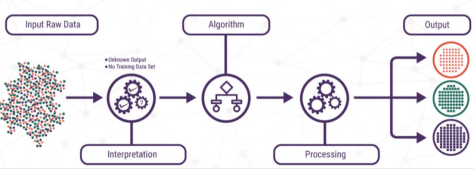

### <font color='yellow'>K-means clustering<font>



The k-means clustering problem attempts to
divide n observations into k clusters using the
Euclidean distance metric, with the objective of
minimizing the variance (sum of squares)
within each cluster. It is a method of vector
quantization, and is useful for feature learning.

K-means assumes spherical clusters that are
separable so that the mean converges towards
the cluster center, and also assumes that the
ordering of the data points does not matter.
The clusters are expected to be of similar size,
so that the assignment to the nearest cluster
center is the correct assignment.

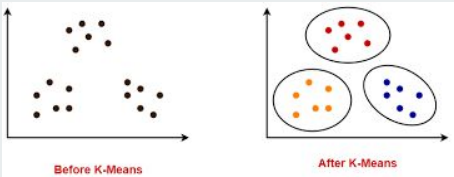

### <font color='yellow'>Hierarchical Agglomerative clustering<font>



Hierarchical cluster analysis (HCA) can be
agglomerative (you build the clusters
bottom-up starting with individual points and
ending with a single cluster) or divisive (you
start with a single cluster and break it up until
you wind up with individual points). If you’re
lucky you can find an intermediate stage of the
clustering process that reflects a meaningful
classification.

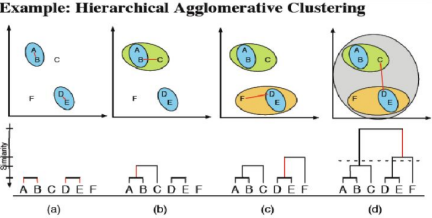

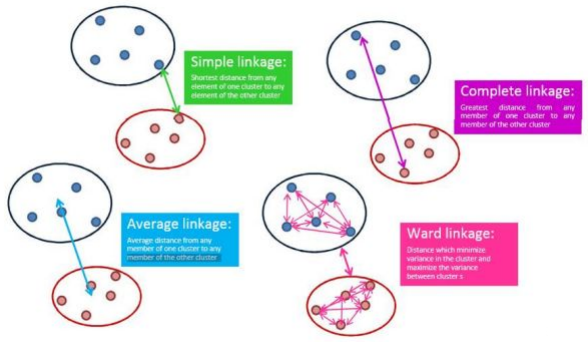

### <font color='yellow'>DBSCAN clustering<font>



Density-based spatial clustering of applications
with noise (DBSCAN) is a non-parametric
data-clustering algorithm that dates from 1996. It is optimized for use with databases that can accelerate geometric region queries
using an R* tree or some other geometric index structure.

Essentially, DBSCAN clusters core points that
have more than some minimum number of
neighbors within some distance Epsilon,
discards as outliers points that have no
neighbors within Epsilon, and adds points that
are within Epsilon of a core point to that
cluster. DBSCAN is one of the most common
clustering algorithms, and can find arbitrarily
shaped clusters.

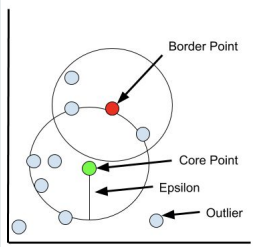

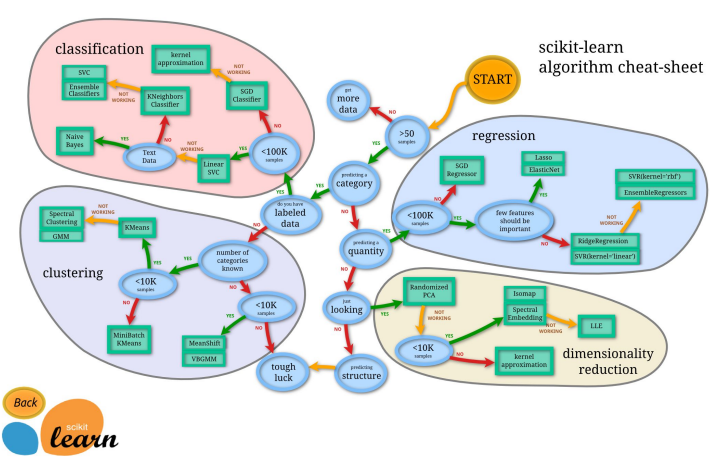

## <font color='pink'>Code<font>



### <font color='orange'>K-Means Clustering<font>



In [ ]:
import numpy as np

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

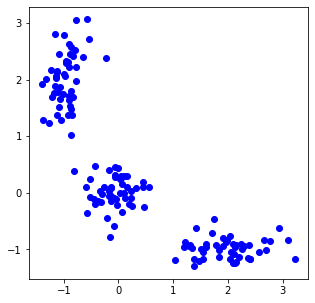

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

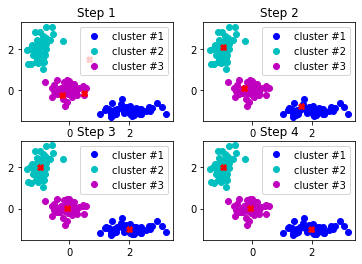

In [ ]:
#Note: First, we find the central points in each cluster.
from scipy.spatial.distance import cdist

np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):

    #Note: Calculate the distance from a point to a centroid
    distances = cdist(X, centroids)

    #Note: Check what's the closest centroid for each point
    labels = distances.argmin(axis=1)
    
    #Note: Label the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

for i in range(4):
   plt.subplot(2, 2, i + 1)
   plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
   plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
   plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
 
   plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
   plt.legend(loc=0)
    
   plt.title('Step {:}'.format(i + 1))

In [ ]:
#Note: We can choose the number of clusters for K-means in this manner.
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

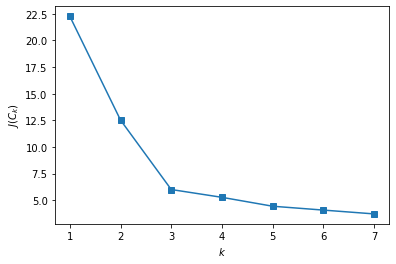

In [ ]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

### <font color='orange'>Aglomerative Clustering<font>



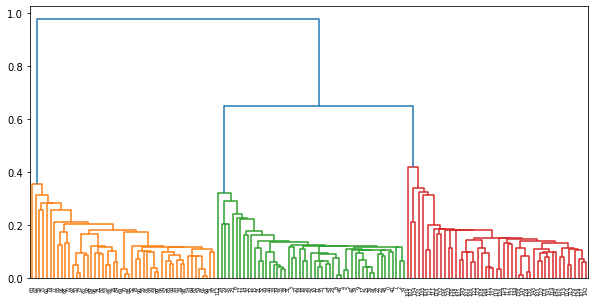

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

#Note: pdist will calculate the upper triangle of the pairwise distance matrix.
distance_mat = pdist(X) 

#Note: linkage is an implementation of the agglomerative algorithm.
Z = hierarchy.linkage(distance_mat, 'single')

plt.figure(figsize=(10, 5))

dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### <font color='orange'>Comparison of clustering algorithms<font>



In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN


data = datasets.load_digits()
X, y = data.data, data.target

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN())

#Note: ARI = Adjusted Rand Index, AMI = Adjusted Mutual Information, Homogenity, Completeness, V-measure = combines both homogenity and completeness ---> all are clustering metrics.
data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity','Completeness', 'V-measure'], index=['K-means', 'Affinity', 'Spectral', 'Agglomerative','DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.662295,7.365665e-01,0.735448,0.742972,0.739191
Affinity,0.174985,6.123988e-01,0.958901,0.486837,0.645800
Spectral,0.756461,8.520396e-01,0.831691,0.876614,0.853562
Agglomerative,0.794003,8.668321e-01,0.857513,0.879096,0.868170
DBSCAN,0.000000,2.314063e-16,0.000000,1.000000,0.000000


### <font color='orange'>Advanced Clustering Example<font>



In [ ]:
!gdown 1HUNIy6dOWX9l6DP83d_kl6WuSraUjAJX

Downloading...
From: https://drive.google.com/uc?id=1HUNIy6dOWX9l6DP83d_kl6WuSraUjAJX
To: /content/bitcointweets.csv
100% 15.1M/15.1M [00:00<00:00, 37.2MB/s]


In [ ]:
df = pd.read_csv("/content/bitcointweets.csv")
df

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,5673,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,372,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,557,0,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,3,0,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [ ]:
df.columns = ['date','text','author','id','unknown','tags','url','sentiment']
df.head()

,date,text,author,id,unknown,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [ ]:
df['sentiment']

0        1
1        2
2        2
3        2
4        2
        ..
50853    2
50854    2
50855    1
50856    2
50857    2
Name: sentiment, Length: 50858, dtype: int64

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.1 MB/s eta 0:00:00


In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
logging.set_verbosity(logging.ERROR)
message_embeddings = embed(df.text.values)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)

clusters = km.labels_.tolist()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings
pca = PCA(2)
 
df_new = pca.fit_transform(data)

In [ ]:
kmeans = KMeans(n_clusters=3)
 
#Note: Predict the labels of clusters.
label = kmeans.fit_predict(df_new)
 
#Note: Getting unique labels.
u_labels = np.unique(label)
 
labels = kmeans.labels_

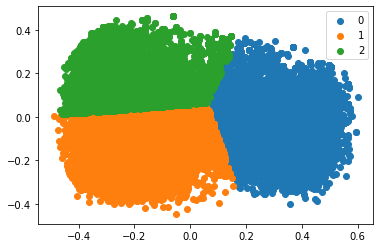

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
    
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(df_new, n_neighbors=10, include_self=False)

In [ ]:
model = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(df_new) 

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 29 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [ ]:
clusters = model.labels_.tolist()
model.labels_ 

array([2, 0, 0, ..., 0, 2, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:280: UserWarning: the number of connected components of the connectivity matrix is 29 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


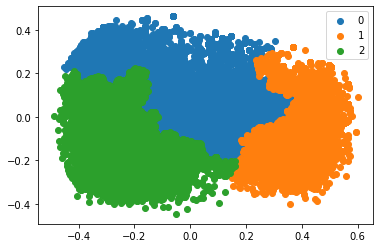

In [ ]:
label = model.fit_predict(df_new)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()